<a href="https://colab.research.google.com/github/Praagnya/Mobile-Price-Prediction-/blob/main/Mobile_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
%matplotlib inline
import io
import warnings
warnings.filterwarnings("ignore")


In [ ]:
from google.colab import files 

uploaded = files.upload()


Saving train (1).csv to train (1).csv


In [ ]:
df = pd.read_csv(io.BytesIO(uploaded['train (1).csv']))

In [ ]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
print(df.columns)
print(df.shape)

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')
(2000, 21)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

 There are no null values in the dataset.  

In [ ]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


# Data Vizualization

## Correlation

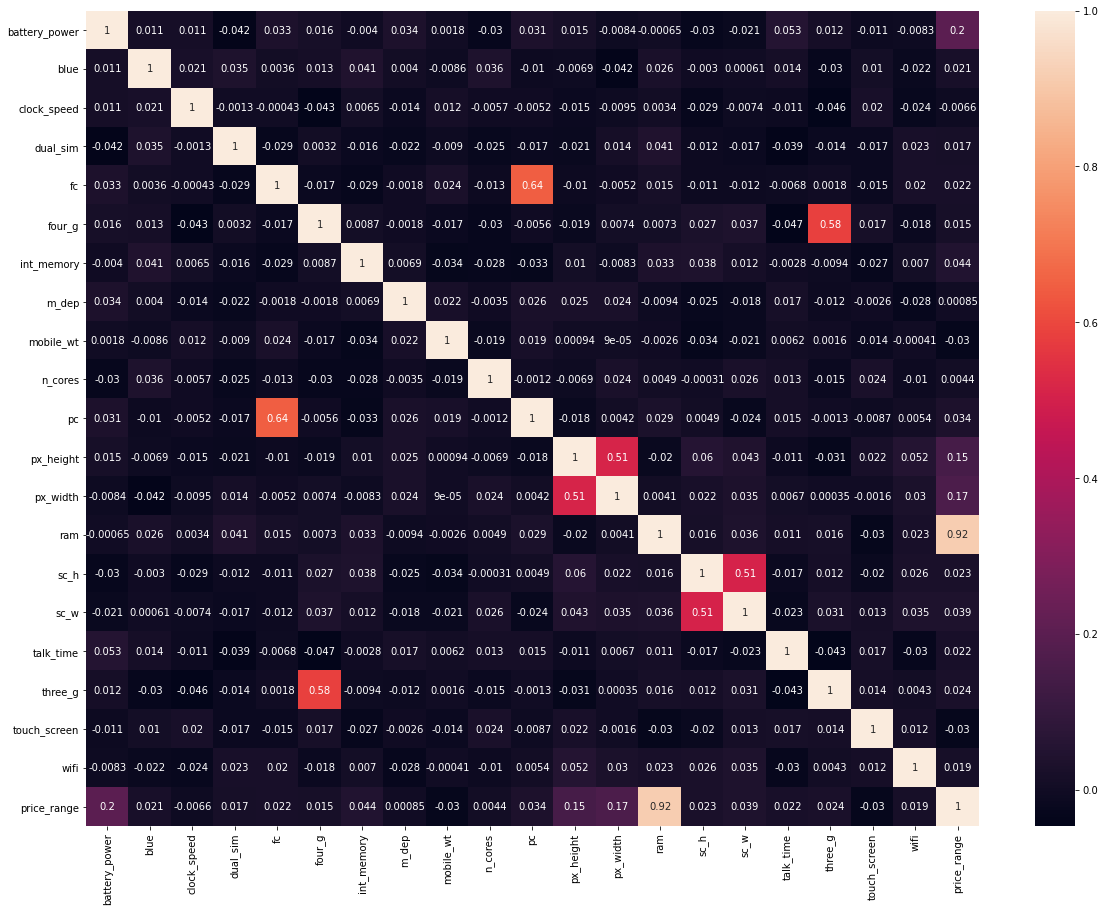

In [ ]:
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,15))
g = sns.heatmap(df[top_corr_features].corr(),annot = True)

## RAM (ram)
Random Access Memory  

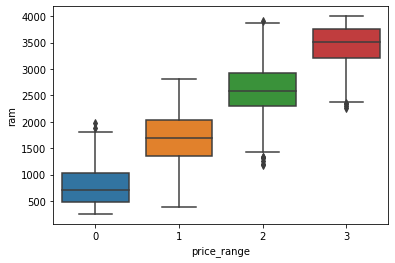

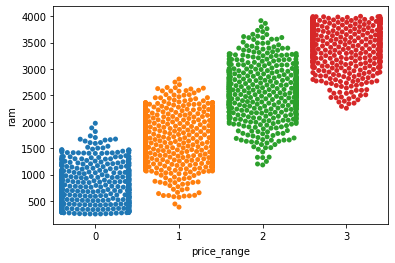

In [ ]:
sns.boxplot(df['price_range'],df['ram']);
plt.show()
sns.swarmplot(df['price_range'],df['ram']);

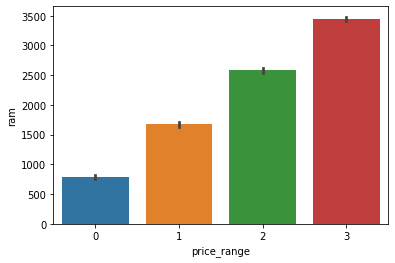

In [ ]:
sns.barplot(df['price_range'],df['ram']);

RAM is strongly correlated with price_range which can be visualized in the above plots. The price range increases as the RAM increases. 

## Battery Power (battery_power)
Total energy a battery can store in mAh

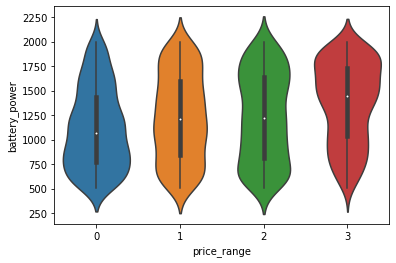

In [ ]:
sns.violinplot(df['price_range'],df['battery_power']);

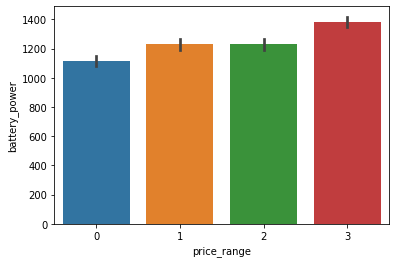

In [ ]:
sns.barplot(df['price_range'],df['battery_power']);

## Pixel Height (px_height) 
Pixel Resolution Height

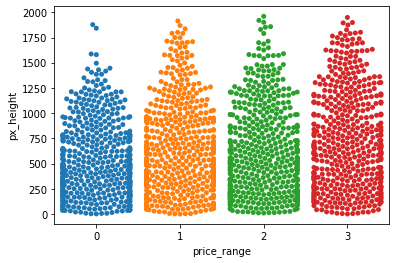

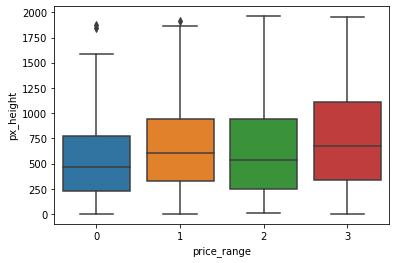

In [ ]:
sns.swarmplot(df['price_range'],df['px_height']);
plt.show()
sns.boxplot(df['price_range'],df['px_height']);

## Pixel Width (px_width)
Pixel Resolution Width

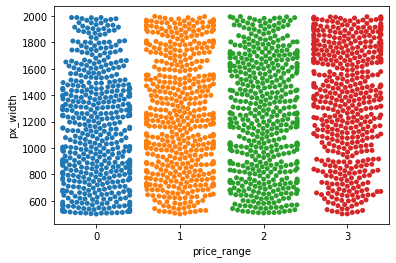

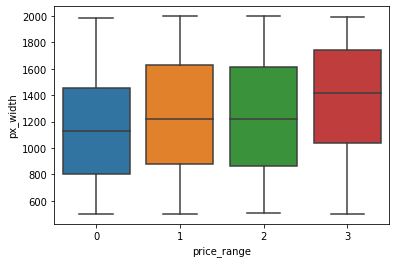

In [ ]:
sns.swarmplot(df['price_range'],df['px_width']);
plt.show()
sns.boxplot(df['price_range'],df['px_width']);

## Front Camera (fc)
Front Camera mega pixels

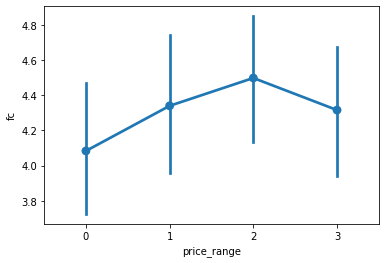

In [ ]:
sns.pointplot(df['price_range'],df['fc'])

## Primary Camera (pc)
Primary Camera mega pixels

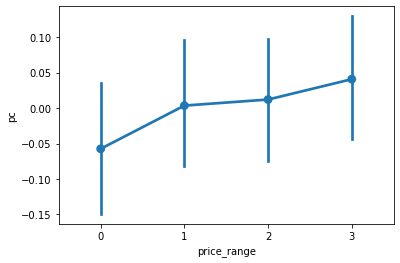

In [ ]:
sns.pointplot(df['price_range'],df['pc']);

## 4G and 3G Supported (four_g, three_g)
4G and 3G compatibility

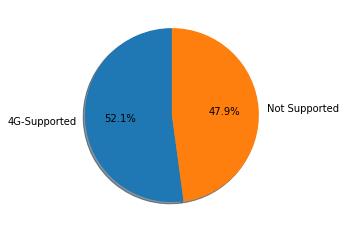

In [ ]:
labels_4g = ['4G-Supported','Not Supported']
values_4g = df['four_g'].value_counts().values
fig1, ax1 = plt.subplots()
ax1.pie(values_4g, labels=labels_4g, shadow=True, startangle=90, autopct='%1.1f%%');

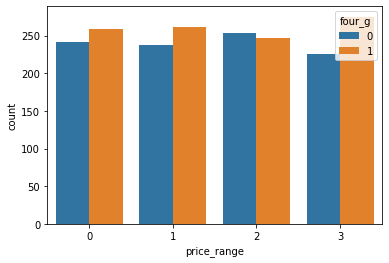

In [ ]:
sns.countplot(df['price_range'],hue=df['four_g'])

Mobile phones belonging to price range 3 have more phones compitable to 4G. However, it is very insignificant with the given dataset. 

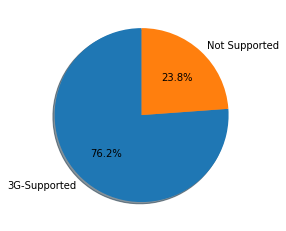

In [ ]:
labels_4g = ['3G-Supported','Not Supported']
values_4g = df['three_g'].value_counts().values
fig1, ax1 = plt.subplots()
ax1.pie(values_4g, labels=labels_4g, shadow=True, startangle=90, autopct='%1.1f%%');

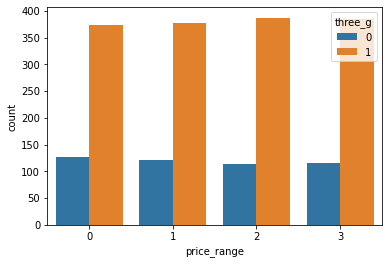

In [ ]:
sns.countplot(df['price_range'],hue=df['three_g'])

Most of the phones are 3G compatible in all price ranges. 

## Internal Memory (int_memory)
Internal Memory in Gigabytes

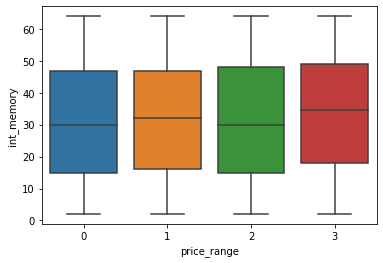

In [ ]:
sns.boxplot(df['price_range'],df['int_memory'])

Internal memory does not play a significant role in categorizing price range. 

## Screen Height and Screen Width (sc_h, sc_w)
Screen height and screen width in cm 

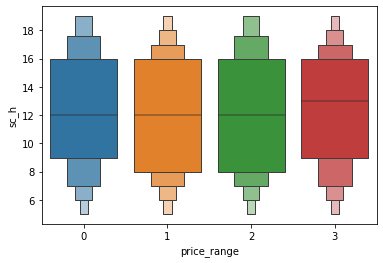

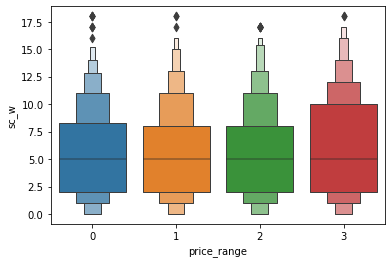

In [ ]:
sns.boxenplot(df['price_range'],df['sc_h'])
plt.show()
sns.boxenplot(df['price_range'],df['sc_w'])

It can be noted that phones belonging to price range 3 have more screen height and width. However, the converse need not be true. 

## Dropping columns

In [ ]:
df = df[~((df['ram'] < 1410) & (df['price_range'] == 2))] #dropping phones less belonging to price range 2 and ram less than 1410 mb. 
df = df[~((df['ram'] > 1650) & (df['price_range'] == 0))] #dropping phones less belonging to price range 0 and ram greater than 1650 mb. 
df = df.drop(columns=(['m_dep'])) #mobile depth doesn't have a role in categorizing price range

## Creating dummy variables 

In [ ]:
df = pd.get_dummies(df, columns = ['blue','dual_sim','four_g','three_g','touch_screen','wifi']) 
# Creating a dummy variable for the categorical features 

## Standing Scaling 

In [ ]:
standardScaler = StandardScaler()
columns_to_scale = ['battery_power','ram','px_height','px_width','mobile_wt','int_memory','sc_h','sc_w','talk_time','fc','n_cores','pc']
df[columns_to_scale] = standardScaler.fit_transform(df[columns_to_scale])
df.head()

,battery_power,clock_speed,fc,int_memory,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,price_range,blue_0,blue_1,dual_sim_0,dual_sim_1,four_g_0,four_g_1,three_g_0,three_g_1,touch_screen_0,touch_screen_1,wifi_0,wifi_1
0,-0.905970,2.2,-0.763318,-1.383477,1.347628,-1.101719,-1.303337,-1.414164,-1.154005,0.386793,-0.785116,0.280625,1.467832,1,1,0,1,0,1,0,1,0,1,0,0,1
1,-0.497557,0.5,-0.993764,1.151444,-0.119679,-0.664948,-0.643609,0.591436,1.711195,0.462215,1.115439,-0.638962,-0.731423,2,0,1,0,1,0,1,0,1,0,1,1,0
2,-1.542545,0.5,-0.532871,0.490161,0.134278,0.208594,-0.643609,1.402741,1.078619,0.436461,-0.309977,-0.868859,-0.364881,2,0,1,0,1,0,1,0,1,0,1,1,0
3,-1.423900,2.5,-0.993764,-1.218156,-0.260766,0.645365,-0.148813,1.296229,1.241414,0.589145,0.877869,0.510521,0.001662,2,0,1,1,0,1,0,0,1,1,0,1,0
4,1.327750,1.2,2.002041,0.655482,0.021408,-1.101719,0.675847,1.278100,-0.093509,-0.659918,-1.022685,-0.868859,0.734747,1,0,1,1,0,0,1,0,1,0,1,1,0


## Train-test Split 

In [ ]:
X=df.drop('price_range',axis=1)
y=df['price_range']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

## Model Training 
## 1) Linear Regression


In [129]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)
lm.score(X_test,y_test)


0.9189962420295408

## 2) Logistic Regression

In [127]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(C=1, 
                              max_iter=1000, 
                              penalty='l1',
                              solver='saga')

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid1 = [
    {'penalty' : ['l1','l2','elasticnet','none'],
     'C' : np.logspace(-4,4,20),
     'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
     'max_iter': [100,1000,2500,5000]
    }
]

In [ ]:
rf_Grid1 = GridSearchCV(estimator = logmodel, param_grid = param_grid1, cv = 3, verbose = True, n_jobs = -1)

In [ ]:
rf_Grid1.fit(X_train,y_train)

Fitting 3 folds for each of 1600 candidates, totalling 4800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 195 tasks      | elapsed:   20.2s
[Parallel(n_jobs=-1)]: Done 679 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 1414 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 2219 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 2920 tasks      | elapsed:  7.5min
[Parallel(n_jobs=-1)]: Done 3674 tasks      | elapsed: 11.0min
[Parallel(n_jobs=-1)]: Done 4482 tasks      | elapsed: 15.9min
[Parallel(n_jobs=-1)]: Done 4800 out of 4800 | elapsed: 18.4min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=LogisticRegression(C=1, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=1000, multi_class='auto',
                                          n_jobs=None, penalty='l1',
                                          random_state=None, solver='saga',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid=[{'C': array([1.00000000e-04, 2.6366...
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                          'max_iter': [100, 1000, 2500, 5000],
              

In [123]:
rf_Grid1.best_estimator_

LogisticRegression(C=0.615848211066026, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [128]:
logmodel.fit(X_train,y_train)
y_predict = logmodel.predict(X_test)
print(accuracy_score(y_test,y_predict))

0.9832214765100671


In [ ]:
pd.crosstab(y_test,y_predict)

col_0,0,1,2,3
price_range,,,,
0,146,2,0,0
1,0,151,1,0
2,0,3,150,2
3,0,0,2,139
